In [1]:
import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0,'/mnt/meom/workdir/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

In [3]:
database = '/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/'
sept_buoyfiles = sorted(glob.glob(database + 'filt-3D/NATL60-CJM165_y2013m09d*.1d_buoyancy_filt-n80-f0.0125.nc'))
sept_wfiles = sorted(glob.glob(database + 'filt-3D/NATL60-CJM165_y2013m09d*.1d_vovecrtz_filt-n80-f0.0125.nc'))
sept_mldfiles = sorted(glob.glob(database + 'MXL/NATL60-CJM165_y2013m09d*.1d_somxl010.nc'))
maskfile= '/mnt/meom/workdir/albert/NATL60/NATL60-I/NATL60_v4.1_cdf_byte_mask_z1-52.nc'

In [4]:
dep=xr.open_dataset(sept_buoyfiles[0])['deptht']

In [5]:
def get_values_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,0:52,jmin:jmax+1,imin:imax+1]
    return values


In [6]:
def Estimate_wb(box,buoy,w,tmask,wmask):
    buoy_box = get_values_in_box(box,buoy)
    w_box = get_values_in_box(box,w)  
    
    tmask_box = get_values_in_box(box,tmask)
    wmask_box = get_values_in_box(box,wmask)
    
        
    if box.name == 'Box_12':
        tmask_box[:,49,950:965,10:140]=0
        
    
    buoy_box_mask=ma.masked_where(tmask_box == 0, buoy_box)
    w_box_mask=ma.masked_where(wmask_box == 0, w_box)
    
    avg_wb_box=np.ones(len(dep))
    
    for k in np.arange(len(dep)):
        avg_wb_box[k] = np.nanmean(buoy_box_mask[0,k,:,:]*w_box_mask[0,k,:,:])
    return avg_wb_box

In [7]:
def get_wb_in_boxes(buoyfiles,wfiles):
    global boxes
    _Ann_wb_arr = []
    for i in range(len(buoyfiles)): 
        print buoyfiles[i]
        buoy = xr.open_dataset(buoyfiles[i])['sobuoy']
        w = xr.open_dataset(wfiles[i])['vovecrtz']
        tmask = xr.open_dataset(maskfile)['tmask']
        wmask = xr.open_dataset(maskfile)['fmask']
        _wb_arr=[]
        for box in boxes:
            wb = Estimate_wb(box,buoy,w,tmask,wmask)
            _wb_arr.append(wb)
        wb_arr = np.array(_wb_arr)
        _Ann_wb_arr.append(wb_arr)
    Ann_wb_arr = np.array(_Ann_wb_arr)
    return Ann_wb_arr

In [8]:
wb_boxes_sept = get_wb_in_boxes(sept_buoyfiles,sept_wfiles)

/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m09d01.1d_buoyancy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m09d02.1d_buoyancy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m09d03.1d_buoyancy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m09d04.1d_buoyancy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m09d05.1d_buoyancy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m09d06.1d_buoyancy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m09d07.1d_buoyancy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL60-CJM165_y2013m09d08.1d_buoyancy_filt-n80-f0.0125.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/filt-3D/NATL6

In [13]:
def get_2Dvalues_in_box(box,data):
    jmin,jmax = box.jmin,box.jmax
    imin,imax = box.imin,box.imax
    values = data[:,jmin:jmax+1,imin:imax+1]
    return values


In [14]:
def Estimate_mld(box,mld):
    mld_box = get_2Dvalues_in_box(box,mld)
    avg_mld_box=np.nanmean(mld_box)
    return avg_mld_box

In [15]:
def get_mld_in_boxes(mldfiles):
    global boxes
    _Ann_mld_arr = []
    for i in range(len(mldfiles)): 
        print mldfiles[i]
        mld = xr.open_dataset(mldfiles[i])['somxl010']
        _mld_arr=[]
        for box in boxes:
            mldb = Estimate_mld(box,mld)
            _mld_arr.append(mldb)
        mld_arr = np.array(_mld_arr)
        _Ann_mld_arr.append(mld_arr)
    Ann_mld_arr = np.array(_Ann_mld_arr)
    return Ann_mld_arr

In [16]:
mld_boxes_sept = get_mld_in_boxes(sept_mldfiles)

/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d01.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d02.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d03.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d04.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d05.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d06.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d07.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d08.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d09.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-CJM165-S/1d/MXL/NATL60-CJM165_y2013m09d10.1d_somxl010.nc
/mnt/meom/workdir/albert/NATL60/NATL60-C

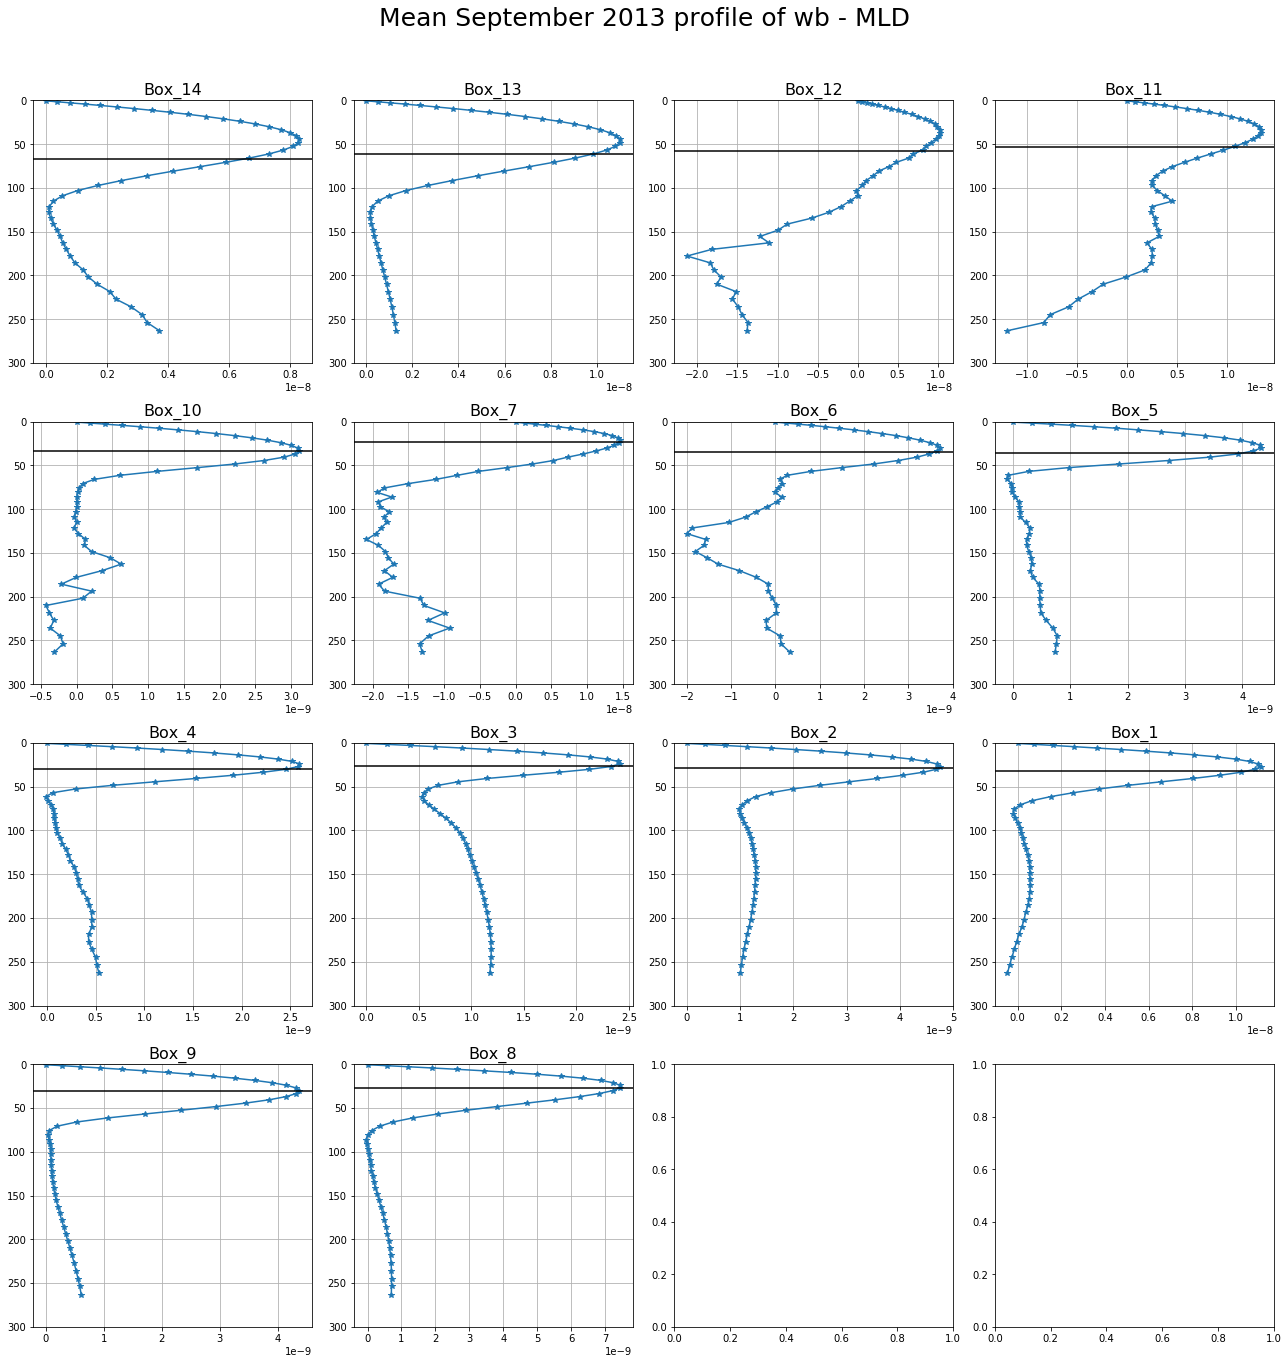

In [17]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mean September 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(wb_boxes_sept[:,k,:],0),dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(300,0)
    axs[i].axhline(y=np.nanmean(mld_boxes_sept[:,k]),color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_sept13.png")

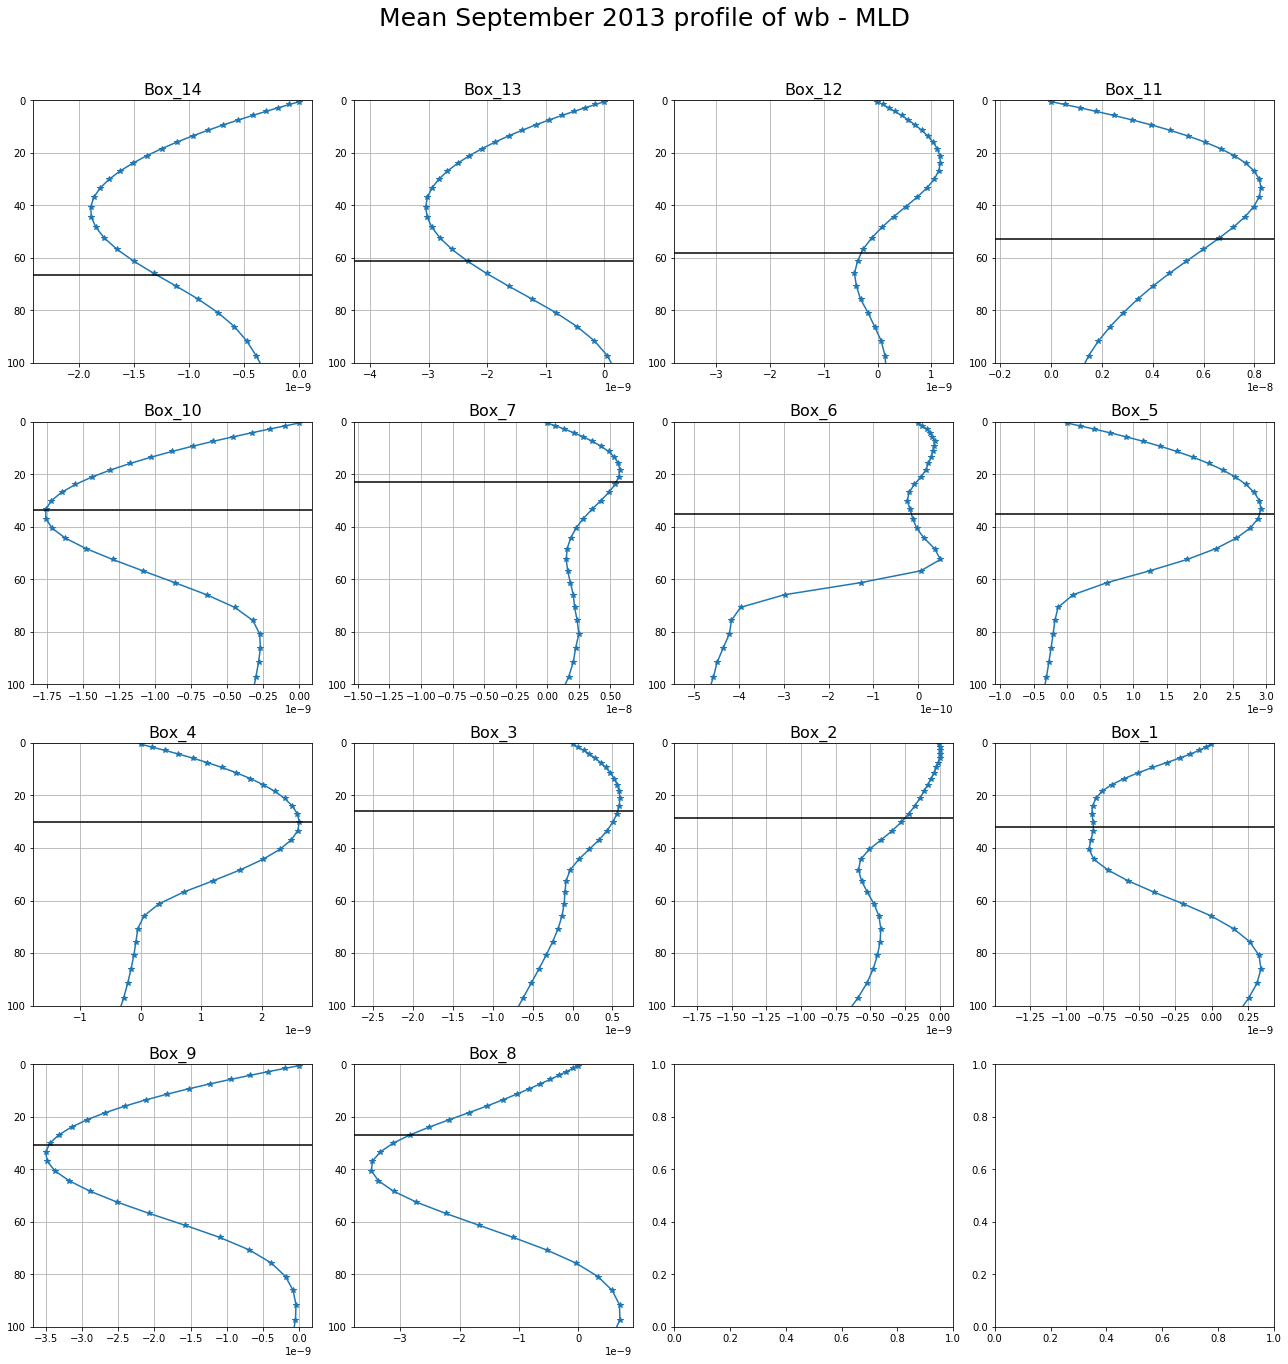

In [16]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Mean September 2013 profile of wb - MLD'
plt.suptitle(title,size = 25,y=1.05)
i = 0
for k,box in enumerate(boxes):
    axs[i].plot(np.nanmean(wb_boxes_sept[:,k,:],0),dep,'C0*-')
    axs[i].set_title(box.name,size=16)
    axs[i].grid(True)
    axs[i].set_ylim(100,0)
    axs[i].axhline(y=np.nanmean(mld_boxes_sept[:,k]),color='k')
    i = i + 1
    fig.tight_layout()
    
plt.savefig("NATL60_wb_profiles_sept13_surf.png")

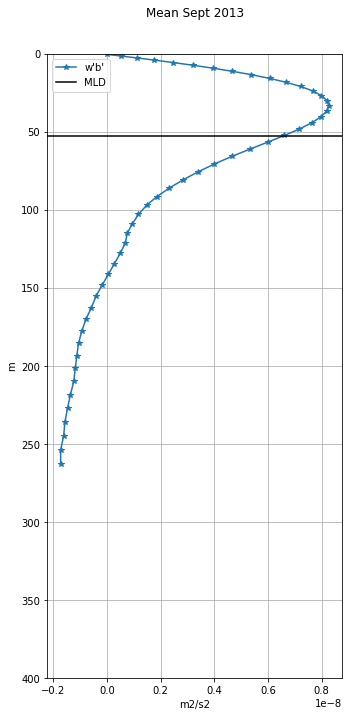

In [19]:
fig, axs = plt.subplots(1,1, figsize=(5, 10))

title = 'Mean Sept 2013'
plt.title(title,size = 12,y=1.05)
i = 0
axs.plot(np.nanmean(wb_boxes_sept[:,3,:],0),dep,'C0*-',label='w\'b\'')
axs.grid(True)
axs.set_ylim(400,0)
axs.axhline(y=np.nanmean(mld_boxes_sept[:,3]),color='k',label='MLD')
plt.xlabel('m2/s2')
plt.ylabel('m')
plt.legend()
fig.tight_layout()
    
plt.savefig("NATL60_box11_wb_profiles_sept13_400m.png")